<a href="https://colab.research.google.com/github/weigangq/CSB-BIOL425/blob/master/BIOL425_regex_sci_comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 5. Regular Expressions
This a review of Python based on the textbook (CSB) Chapter 5)

Save a copy in your own Google account using the menu: File -> "Save a copy in Drive"

## 5.3 Regular Expressions in Python

#### 5.3.1 The `re` Module in Python

In [ ]:
import re #import the python module re

In [ ]:
my_string = "a given string"
m = re.search(r"given", my_string) 

In [ ]:
# returns a "match" object:
print(m)

<re.Match object; span=(2, 7), match='given'>


In [ ]:
# extract match:
m.group()

'given'

In [ ]:
# returns false if no match
m = re.search(r"9", my_string)
print(m)

None


## 5.4 Building Regular Expressions


### 5.4.2 Metacharacters
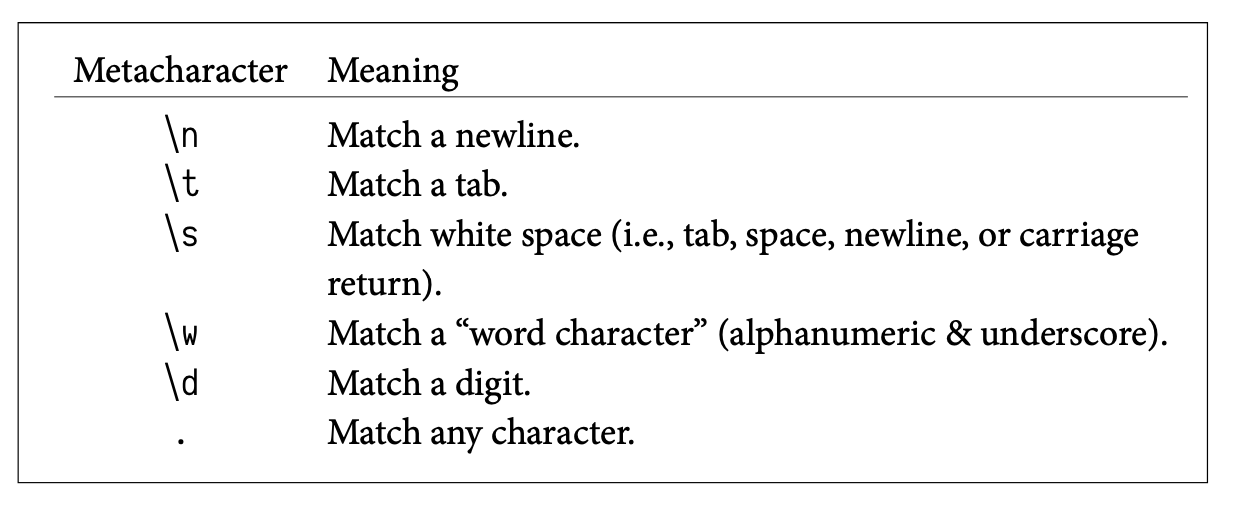

In [ ]:
my_string = "a given string"

In [ ]:
# match white space
m = re.search(r"\s", my_string)
m.group()

' '

In [ ]:
# match 1 white space followed by 5 "word" characters
m = re.search(r"\s\w\w\w\w\w", my_string)
m.group()

' given'

### 5.4.3 Sets
Sets are defined by square brackets "[ ]" and are used to provide several options or a range of charcters to match.

Alternative characters (not alternative strings, which uses "|", see below)

In [ ]:
my_string = "sunflowers are described on page 89"

In [ ]:
# search for word that starts with lowercase or uppercase "s" 
# followed by two word characters
m = re.search(r"[sS]\w\w", my_string)
m.group()

'str'

In [ ]:
# search for a number with two digits
m = re.search(r"[0-9][0-9]", my_string)
m.group()

'89'

In [ ]:
# match a character not in s-z 
#followed by 6 word characters, skipps "s" and "u"
m = re.search(r"[^s-z]\w\w\w\w\w\w", my_string)
m.group()

'nflower'

### 5.4.4 Quantifiers
We can use quantifiers to determine how many characters of a certain type to expect. 
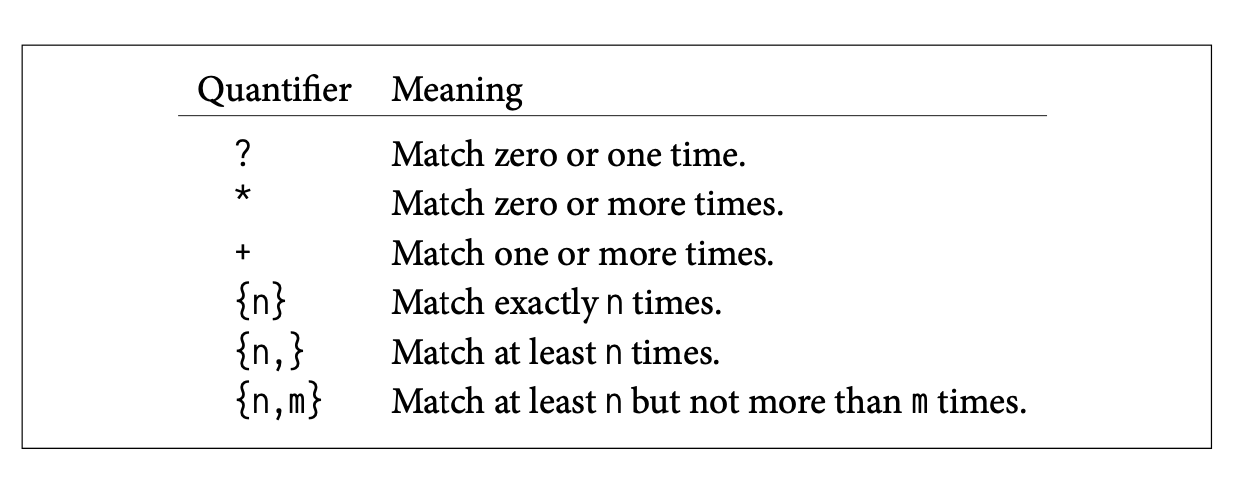


In [ ]:
# 1 white space followed by exactly 5 "word" characters
m = re.search(r"\s\w{5}", my_string)
m.group()

' descr'

In [ ]:
# 1 or more captial letters A, C, G, or T
re.search(r"[ACGT]+", "A possible explanation is the motif ATTCGT.").group()

'A'

In [ ]:
re.search(r"[ACGT]{3,}", "A possible explanation is the motif ATTCGT.").group()

'ATTCGT'

In [ ]:
my_string = "once upon a time"

In [ ]:
# match any number of characters 
# followed by a white space; return the longest string ending with a space
m = re.search(r".*\s", my_string)
m.group()

'once upon a '

In [ ]:
re.search(r".*?\s", "once upon a time").group()

'once '

### 5.4.5 Anchors
Use the caret symbol (^) to match the beginning of a string, and the dollar sign ($) to match the end

Don't confuse with the inverse set construct "[^s-z]", which does not indicate beginning of a string

In [ ]:
# the pattern is present, but not at the beginning of the string: the function foes not find a match
my_string = "ATATA"
m = re.search(r"^TATA", my_string)
print(m)

None


In [ ]:
# searching at the end of the string is successful 
m = re.search(r"TATA$", my_string)
m.group()

'TATA'

### <font color='green'>**Exercise: Intermezzo 5.1** </font>

Describe the following regular expressions in plain English. What does the regular expression match? You can type each command into your notebook to see the results. 

1.   `re.search(r"\d", "it takes 2 to tango").group()`
2.   `re.search(r"\w*\s\d.*\d", "take 2 grams of H2O").group()`
3.   `re.search(r"\s\w*\s", "once upon a time").group()`
4.   `re.search(r"\s\w{1,3}\s", "once upon a time").group()`
5.   `re.search(r"\s\w*$", "once upon a time").group()`


### 5.4.6 Alternate strings
We can use the pipe symbol ( | ) to match either everything to the left of the pipe symbol, or everything to the right of it. 

In [ ]:
# match
my_string = "I found a cat!"
m = re.search(r"cat|mouse", my_string)
m.group()

'cat'

### <font color='green'>**Exercise: Intermezzo 5.2** </font>

Let's practice translating from plain English to regular expressions. The NCBI GenBank contains information on nucleotide sequences, protein sequences, and whole genome sequences (WGS). The following table describes the construction of sequence identifiers in plain English. Construct the appropriate regular expressuin to match either protein, WGS or nucleotide ids.  

See latest NCBI accession rules: https://www.ncbi.nlm.nih.gov/genbank/acc_prefix/

1.   Protein: 3 uppercase letters + 5 numerals
2.   Nucleotide: 1 uppercase letter + 5 numerals OR 2 uppercase letters + 6 numerals

Use "git pull" to update the course repository. Write a python code to read the genbank file "mk622931.gb". While scanning line by line, construct two regex statements to print out the Nucleotide and a Protein accession numbers according to the above two rules 

### 5.4.7 Raw String Notation and Escaping Metacharacters
You may have noticed that we put an `r` in front of our regular expressions. This means that we want to evaluate the string in its "raw" form. Without it, Python would automatically interpret any special characters. 

In [ ]:
# Python interprets the metacharacter
print("my long \n line")

my long 
 line


In [ ]:
#use of the raw formal of the string (by prepending an r) means that Python will not interpret the metacharacter 
print(r"my long \n line")

my long \n line


In [ ]:
# If we want to search for something that looks like a metacharacter, such as \n, in a raw string, 
# we have to escape the metacharacter with another "\"
my_string = r"my long \n line"
m = re.search(r"\\n", my_string)
m.group()

'\\n'

In [ ]:
 # clone the course github to your google drive (run only once!!)
 # !git clone https://github.com/weigangq/CSB-BIOL425.git

In [ ]:
!git clone https://github.com/weigangq/CSB-BIOL425.git

Cloning into 'CSB-BIOL425'...
remote: Enumerating objects: 1090, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 1090 (delta 44), reused 82 (delta 42), pack-reused 1005
Receiving objects: 100% (1090/1090), 28.75 MiB | 17.95 MiB/s, done.
Resolving deltas: 100% (433/433), done.


In [ ]:
# use !command to run Unix commands
!pwd
!ls -lrt CSB-BIOL425/regex/data/

/content
total 3508
-rw-r--r-- 1 root root      69 Mar  1 16:17 16S_regex_pattern.txt
-rw-r--r-- 1 root root   52688 Mar  1 16:17 Ecoli.fasta
-rw-r--r-- 1 root root     197 Mar  1 16:17 Ecoli_about.txt
drwxr-xr-x 2 root root    4096 Mar  1 16:17 MapOfScience
-rw-r--r-- 1 root root 2677487 Mar  1 16:17 Marra2014_BLAST_data.txt
-rw-r--r-- 1 root root     881 Mar  1 16:17 Marra2014_about.txt
-rw-r--r-- 1 root root  835612 Mar  1 16:17 bee_list.txt
-rw-r--r-- 1 root root    1521 Mar  1 16:17 bee_list_about.txt


In [ ]:
# open file and generate a file handle
# prints all the lines that contain an asterisk and informs us that 6 lines contain a match
# check with the Unix "grep" command
with open("CSB-BIOL425/regex/data/Marra2014_BLAST_data.txt") as f:
  counter = 0 # initiate counter for matches
  for line in f: # search for pattern in each line
    m = re.search(r"\*", line)
    if m: # only if a match was found, increase counter and print the line
      counter += 1
      print(line)

print("The pattern was matched in {0} lines".format(counter)) # print information on how many lines contain a match

contig01987	2b14_human ame: full=hla class ii histocompatibility drb1-4 beta chain ame: full=mhc class ii antigen drb1*4 short=dr-4 short=dr4 flags: precursor	112	5	5.07E-10	78.60%

contig05816	1c08_human ame: full=hla class i histocompatibility cw-8 alpha chain ame: full=mhc class i antigen cw*8 flags: precursor	825	5	1.06E-97	67.80%

contig05821	1b46_human ame: full=hla class i histocompatibility b-46 alpha chain ame: full=bw-46 ame: full=mhc class i antigen b*46 flags: precursor	606	5	9.86E-09	67.60%

contig22120	2b11_human ame: full=hla class ii histocompatibility drb1-1 beta chain ame: full=mhc class ii antigen drb1*1 short=dr-1 short=dr1 flags: precursor	137	5	5.05E-11	76.80%

contig23154	mmrn1_human ame: full=multimerin-1 ame: full=emilin-4 ame: full=elastin microfibril interface located protein 4 short=elastin microfibril interfacer 4 ame: full=endothelial cell multimerin contains: ame: full=platelet glycoprotein ia* contains: ame: full=155 kda platelet multimerin short=p-155 s

In [ ]:
# We can refine our regular expression to exclude unwanted lines, returning only the full name of the MHC allele
with open("CSB-BIOL425/regex/data/Marra2014_BLAST_data.txt") as f:
  for line in f: 
    m = re.search(r"mhc[\s\w*]+\*\w*", line)
    if m:
      print(m.group())

### individual parts of the regular expression:
# mhc -> matche the literal characters mhc
# [\s\w*]+ -> match a white space or zero or more word characters, one or more times ( the + makes it greedy; otherwise 1st occurance)
# \* -> match a (literal) asterisk
# \w* -> match zero or more word characters

mhc class ii antigen drb1*4
mhc class i antigen cw*8
mhc class i antigen b*46
mhc class ii antigen drb1*1


## 5.5 Functions of the `re` Module
The module `re` provides many functions. Some of the commonly used ones are shown below. 

`help(re)` also provides information on functions, as well as an extended list of metacharacters. 

In [ ]:
# install a package for working with FASTA sequence files
!pip install pyfaidx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
import pyfaidx

In [ ]:
# read the .fasta file as pyfaidx.Fasta data type as a dictionary
genes = pyfaidx.Fasta("CSB-BIOL425/regex/data/Ecoli.fasta")

In [ ]:
# the pyfaidx.fasta object behaves like a dictionary. The keys are the names of the FASTA sequences
# convert keys of dictionary to list
records = list(genes.keys())
records

['gi|556503834|ref|NC_000913.3|:1978338-2028069',
 'gi|556503834|ref|NC_000913.3|:4035299-4037302']

In [ ]:
# extract first sequence from genes dictionary 
# get sequence start to finish
seq1 = genes[records[0]][:]

In [ ]:
# explore pyfaidx.Sequence object seq1 
# call end attribute to determine length of sequence
print(seq1.end)
print(len(seq1))

49732
49732


In [ ]:
# the seq function returns our sequence as a string, a prerequisite to applying re function
seq1_str = seq1.seq

# print the first 40 nucleotides
seq1_str[:40]

'AATATGTCCTTACAAATAGAAATGGGTCTTTACACTTATC'

In [ ]:
# literal search for the pattern "GATC", which is target site of the DNA methylase "Dam"
m = re.search(r"GATC", seq1_str)
m.group()

'GATC'

In [ ]:
# extract the start and end positions of the match
# remember: Python starts counting at 0!
m.start()

130

In [ ]:
# noninculsive, similar to range function
m.end()

134

In [ ]:
# find all occurances of a mythylase (EcoKI) target site
#  with the pattern of "AACN{6}GTGC" or "GCACN{6}GTT"
# return a list of matches (or None)
m = re.findall(r"AAC[ATCG]{6}GTGC|GCAC[ATCG]{6}GTT", seq1_str)
if m:
  print("Number of target sites:", len(m))
  print("matches:", m)

Number of target sites: 6
matches: ['AACAGCATCGTGC', 'AACTGGCGGGTGC', 'GCACCACCGCGTT', 'GCACAACAAGGTT', 'GCACCGCTGGGTT', 'AACCTGCCGGTGC']


In [ ]:
# to retreive all match objects, use an iterator:
hits = re.finditer(r"AAC[ATCG]{6}GTGC|GCAC[ATCG]{6}GTT", seq1_str)
for hit in hits:
  print(hit.start(), hit.group())

18451 AACAGCATCGTGC
18749 AACTGGCGGGTGC
25766 GCACCACCGCGTT
35182 GCACAACAAGGTT
40744 GCACCGCTGGGTT
42031 AACCTGCCGGTGC


## 5.6 Groups in Regular Expression
Groups are defined by surrounding part(s) of the regular expression with parentheses "( )". 

In [ ]:
# match a G, followed by 2 T's 
re.search(r"GT{2}", "ATGGTGTCCGTGTT").group()

'GTT'

In [ ]:
# match GT twice
re.search(r"(GT){2}", "ATGGTGTCCGTGTT").group()

'GTGT'

In [ ]:
# this pattern captures a pair of PCR primers: (forward primer) - (amplicon) - (reverse primer)
with open("CSB-BIOL425/regex/data/16S_regex_pattern.txt") as f:
  regpat = f.readline() # read first line
  print(regpat)

(AAC[AC]GGATTAGATACCC[GT]G)([ATCG]+)([CT]T[AG]AAACTCAAATGAATTGACGGGG)


In [ ]:
seq2_str = genes[records[1]][:].seq
amp = re.compile(regpat) #compile regex pattern
m = amp.search(seq2_str)

In [ ]:
# now we can individually return the matched grouos
# group (0) returns the entire match
# we look at only the first 40 nucleotides
m.group(0)[:40]

'AACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGAT'

In [ ]:
# group(1) returns the first group - our forward primer
m.group(1)[:40]

'AACAGGATTAGATACCCTG'

In [ ]:
!ls CSB-BIOL425/regex/data/

16S_regex_pattern.txt  Ecoli_about.txt	MapOfScience
bee_list_about.txt     Ecoli.fasta	Marra2014_about.txt
bee_list.txt	       Ecoli.fasta.fai	Marra2014_BLAST_data.txt


In [ ]:
!cat CSB-BIOL425/regex/data/16S_regex_pattern.txt

(AAC[AC]GGATTAGATACCC[GT]G)([ATCG]+)([CT]T[AG]AAACTCAAATGAATTGACGGGG)

In [ ]:
# the above line defines a PCR primer pair:
#### 1st group: forward primer
#### 2nd group: amplicon
#### 3rd group: reverse primer
# a digital PCR, to scan a sequence for existence of an amplicon

# save the above regex pattern to a variable
regpat = "(AAC[AC]GGATTAGATACCC[GT]G)([ATCG]+)([CT]T[AG]AAACTCAAATGAATTGACGGGG)"

# get 2nd seq
seq2_str = genes[records[1]][:].seq

# compile regex pattern
amp = re.compile(regpat)

# search
m = amp.search(seq2_str)

# print matches (group[0] is the whole match; skip)
# notice the parentheses (not square brackets)
print("forward primer:", m.group(1))
print("amplicon:", m.group(2))
print("reverse primer:", m.group(3))

forward primer: AACAGGATTAGATACCCTG
amplicon: GTAGTCCACGCCGTAAACGATGTCGACTTGGAGGTTGTGCCCTTGAGGCGTGGCTTCCGGAGCTAACGCGTTAAGTCGACCGCCTGGGGAGTACGGCCGCAAGG
reverse primer: TTAAAACTCAAATGAATTGACGGGG


# Chapter 6. Scientific Computing
This a review of Python based on the textbook (CSB) Chapter 6

Save a copy in your own Google account using the menu: File -> "Save a copy in Drive" 

Detailed instructions on how to install these packages can be found in the directiory `CSB/scientific/installation`.

## 6.2 Scientific Programming with `NumPy` and `SciPy`

### 6.2.1 `NumPy` Arrays

In [ ]:
import numpy as np 

In [ ]:
# create a numpy array
a = np.arange(9)
print(a)
print(type(a))
a * 2 # double each item

[0 1 2 3 4 5 6 7 8]
<class 'numpy.ndarray'>


array([ 0,  2,  4,  6,  8, 10, 12, 14, 16])

In [ ]:
# create a list
a1 = list(range(9))
print(a1)
print(type(a1))
print(a1 * 2) # double the list

[0, 1, 2, 3, 4, 5, 6, 7, 8]
<class 'list'>
[0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8]


In [ ]:
# add 2 to elements of array
2 + a

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

Many attributes and functions are associated with arrays: 

In [ ]:
# length along each dimension
a.shape

(9,)

In [ ]:
#number of dimensions
a.ndim

1

In [ ]:
# data type of content
a.dtype.name

'int64'

In [ ]:
# number of elements
a.size

9

Arrays provide many useful methods to perform arithmetical and statistical operations: 

In [ ]:
a.sum()

36

In [ ]:
a.mean()

4.0

In [ ]:
# standard deviation
a.std()

2.581988897471611

In [ ]:
a.min()

0

In [ ]:
a.max()

8

In [ ]:
# square root
np.sqrt(a)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712])

In [ ]:
#exponentiation
np.exp(a)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03])

Creating arrays:

In [ ]:
# convert list to one-dimensional array
a1 = np.array([1, 2, 3, 4])
print(a1)
a1.dtype.name

[1 2 3 4]


'int64'

In [ ]:
a1 = np.array([1.0, 2.0, 3.0, 4.0])
print(a1)
a1.dtype.name

[1. 2. 3. 4.]


'float64'

In [ ]:
# convert list of lists to two-dimensional array
m = np.array([[1, 2],[3, 4]])
m

array([[1, 2],
       [3, 4]])

In [ ]:
# determine data type
m = np.array([[1, 2],[3, 4]], dtype = float)
print(m)
m.dtype.name

[[1. 2.]
 [3. 4.]]


'float64'

Initialize arrays with given structure: 

In [ ]:
# create 3x2 array filled with 0.0 (floating-point)
m = np.zeros((3, 2), dtype = float)
m

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
# create 2x3 array filled eith 1+0i (complex numbers)
m = np.ones((2, 3), dtype = complex)
m

array([[1.+0.j, 1.+0.j, 1.+0.j],
       [1.+0.j, 1.+0.j, 1.+0.j]])

In [ ]:
# create an array containing the integers from 0 to 8 and arrange it in a 3x3 array
a = np.arange(9)
a.reshape((3,3))

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [ ]:
# create an array with random values drawn from uniform distribution U[0,1]
np.random.random(size=(2,3))

array([[0.0387662 , 0.23558495, 0.87887479],
       [0.91520366, 0.49556613, 0.17530725]])

You can access the elements using indices, similar to lists:

In [ ]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
# access a coefficient
a[1]

1

In [ ]:
# create a slice
a[:4]

array([0, 1, 2, 3])

In [ ]:
# you can use negative indices
a[-3:]

array([6, 7, 8])

In [ ]:
m = np.arange(16).reshape((4,4))
m

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [ ]:
# extract submatrix
m[0:3, 1:4]

array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 9, 10, 11]])

In [ ]:
# this is the second row
m[1]

array([4, 5, 6, 7])

In [ ]:
# this is the second column 
m[:, 1]

array([ 1,  5,  9, 13])

You can operate by rows, by columns, etc:

In [ ]:
# whole matrix operation
m.sum()

120

In [ ]:
# col sums
m.sum(axis = 0)

array([24, 28, 32, 36])

In [ ]:
# row sums
m.sum(axis = 1)

array([ 6, 22, 38, 54])

To read data into `NumPy`, use the function `np.loadtxt`:

In [ ]:
# m = np.loadtxt("my_matrix_file.csv", delimiter = ",")

### Example: Image Processing with `NumPy`
We can use the `NumPy` library for image processing. In a computer, an image is typically stored as a three-dimensional numerical array. 

The height of the image corresponds to the y-axis and the width of the image to the x-axis. The third dimension refers, for example, to the red, green, or blue channel in an RGB color image. 

In [ ]:
# clone the course github to your google drive (run only once!!)
#!git clone https://github.com/weigangq/CSB-BIOL425.git

In [ ]:
# use !command to run Unix commands
!pwd
!ls -lrt CSB-BIOL425/scientific/data

/content
total 2056
-rw-r--r-- 1 root root    469 Mar  1 16:17 Dale2015_about.txt
-rw-r--r-- 1 root root    981 Mar  1 16:17 Fox2015_about.txt
-rw-r--r-- 1 root root 484906 Mar  1 16:17 Dale2015_data.csv
-rw-r--r-- 1 root root   3203 Mar  1 16:17 Gachter2016_data.csv
-rw-r--r-- 1 root root    704 Mar  1 16:17 Gachter2016_about.txt
-rw-r--r-- 1 root root 836414 Mar  1 16:17 Fox2015_data.csv
-rw-r--r-- 1 root root 754464 Mar  1 16:17 Kacsoh2013_Drosobrain.png
-rw-r--r-- 1 root root    523 Mar  1 16:17 Kacsoh2013_about.txt


In [ ]:
import numpy as np
import skimage.io as io

<class 'numpy.ndarray'>


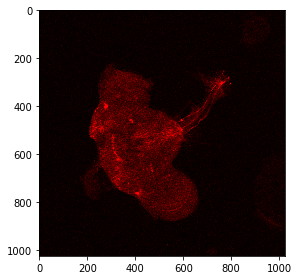

In [ ]:
# load and show the image using the io library 
# This is a confocal microscopy image of fruit fly brain
# showing two neuropeptide F (NPF) and it receptor (NPFR1), coupled to a reporter gene
# female fruit fly lay eggs in alcoholic food to defend against parasitic wasps
# the behavior is regulated by the neuropeptide F
image = io.imread("CSB-BIOL425/scientific/data/Kacsoh2013_Drosobrain.png")
io.imshow(image)
print(type(image))

In [ ]:
image.shape 
# 4 channels (RGB-A)
#  first two are sptial coordinates

(1024, 1024, 4)

In [ ]:
# extract the red channel RGB, 0-255
red = image[:,:,0]
red.mean()

23.1810245513916

In [ ]:
red.std()

30.44674082199301

In [ ]:
red.min()

0

In [ ]:
red.max()

255

In [ ]:
# extract the green channel
green = image[:,:,1]

In [ ]:
# mean value of the green channel (no green or blue data)
green.mean()

0.0

In [ ]:
# create a copy of the image
img_copy = image.copy()

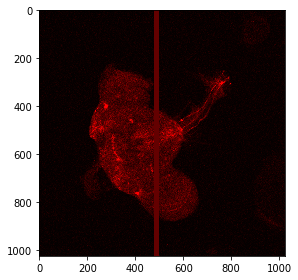

In [ ]:
# use Python slicing to change color values of the part of the red channel in the image
# all rows, cols 400 to 499, to show threhold color
img_copy[:, 480:500, 0] = 100 # threshold
io.imshow(img_copy)

Create a new array where we select only pixels that exceed the threshold, and then count their numbers:

In [ ]:
threshold = 100 # under which we define that the gene is not expressed
# create mask -> array of Booleans that determines whether pixel intensity of red channel is above threshold
mask = red > threshold
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

/usr/local/lib/python3.8/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


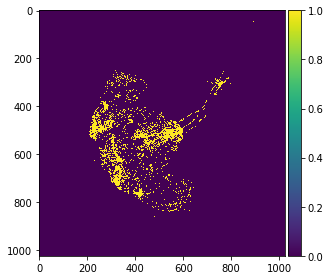

In [ ]:
# as True == 1 and False == 0, we can plot the mask
# to highlight where the gene is expressed (yes, no)
# 0 is shown as black (expressed), 1 as white (not expressed)
io.imshow(mask * 1)

In [ ]:
# sum of mask array (i.e., number of 1s) equals number of pixels with NPF/NPFR1 expression
mask.sum()

37037

4855070

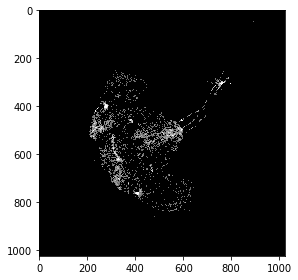

In [ ]:
# show black-white, with gray-scale
mask2 = red * (red > threshold)
io.imshow(mask2)
mask2.sum()

### 6.2.2 Random Numbers and Distributions 

In [ ]:
import numpy as np

In [ ]:
# sample two random numbers from U[0,1]
rng = np.random.default_rng() # initialize a random number generator (only once)
rng.random(2)

array([0.3265472 , 0.83755443])

In [ ]:
# sample integers
# provide arguments maximum and how many draws
np.random.random_integers(5, size = 10)

<ipython-input-69-7d51e36bfcfa>:3: DeprecationWarning: This function is deprecated. Please call randint(1, 5 + 1) instead
  np.random.random_integers(5, size = 10)


array([5, 4, 4, 5, 3, 3, 3, 4, 3, 4])

In [ ]:
# provide arguments min, max, and how many
np.random.random_integers(-5, -3, size =4)

<ipython-input-70-daf732166931>:2: DeprecationWarning: This function is deprecated. Please call randint(-5, -3 + 1) instead
  np.random.random_integers(-5, -3, size =4)


array([-3, -5, -4, -3])

In [ ]:
# randomize the order of the elements in an array
a = np.arange(4)
a

array([0, 1, 2, 3])

In [ ]:
np.random.shuffle(a) # shuffle in place
a

array([1, 3, 2, 0])

In [ ]:
# sample random values from many common distribution 
# beta distribution
# parameters: alpha, beta. size
np.random.beta(1/2, 1/2, 4)

array([0.63099181, 0.85171314, 0.43295338, 0.77831216])

In [ ]:
np.random.standard_normal(size = 3)

array([-0.19452262, -0.58106873, -1.41137191])

In [ ]:
# normal distribution
# parameters: mean, standard dev, size
np.random.normal(10, 0.1, 4)

array([9.93053344, 9.89635201, 9.89335892, 9.98506465])

In [ ]:
# mutivariate normal
# parameters vector of means, covariance matrix, size
mus = [1,3] # vector of means
cov = [[1, 0.3], [0.4, 2]] # covariance matric
np.random.multivariate_normal(mus, cov, 3)

<ipython-input-250-7fb6798c0c4c>:5: RuntimeWarning: covariance is not positive-semidefinite.
  np.random.multivariate_normal(mus, cov, 3)


array([[ 1.27986507,  3.12347007],
       [ 0.10737229,  2.2135623 ],
       [-0.28526739,  2.55434589]])

In [ ]:
# generation of these numbers start with a seed
# sample two numbers from a uniform distribution
print(np.random.random(1))
print(np.random.random(1))

# always observe different values

[0.20592059]
[0.08759376]


In [ ]:
# set the seed, and then restart the sequence of random numbers from the top
np.random.seed(10)
print(np.random.random(1))
print(np.random.random(1))
np.random.seed(10)
print(np.random.random(1))
print(np.random.random(1))

[0.77132064]
[0.02075195]
[0.77132064]
[0.02075195]


## 6.3 Working with `pandas`

`pandas` is the Python Data Analysis Library, introducing a data structure similar to the `data.frame` in R. `pandas` provides two main data structures: Series and DataFrame.

In [ ]:
import pandas
import numpy as np # typically, both are needed

In [ ]:
# read CSV into pandas DataFrame
# sexual selection in birds
data = pandas.read_csv("CSB-BIOL425/scientific/data/Dale2015_data.csv") 
# this function creates a dataframe object, made of rows and columns

In [ ]:
# attribute "shape" determines the number of rows and columns of the dataframe
data.shape

(5831, 5)

In [ ]:
# use "head" to return first few rows of the dataset
# use "tail" to return last few rows
print(data.head)
print(data.tail)
# to access the names of the columns
data.columns
# returns an Index object with the column labels

<bound method NDFrame.head of                Scientific_name                 English_name  \
0       Abroscopus albogularis         Rufous-faced Warbler   
1       Abroscopus schisticeps          Black-faced Warbler   
2     Abroscopus superciliaris       Yellow-bellied Warbler   
3     Acanthagenys rufogularis     Spiny-cheeked Honeyeater   
4          Acanthidops bairdii             Peg-billed Finch   
...                        ...                          ...   
5826     Zosterops uropygialis     Golden-bellied White-eye   
5827        Zosterops vaughani              Pemba White-eye   
5828    Zosterops vellalavella             Banded White-eye   
5829        Zosterops wallacei  Yellow-spectacled White-eye   
5830     Zosterops xanthochroa       Green-backed White-eye   

                      TipLabel  Female_plumage_score  Male_plumage_score  
0       Abroscopus_albogularis             45.833333           51.944444  
1       Abroscopus_schisticeps             48.888889           

Index(['Scientific_name', 'English_name', 'TipLabel', 'Female_plumage_score',
       'Male_plumage_score'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Female_plumage_score'}>,
        <AxesSubplot:title={'center':'Male_plumage_score'}>]],
      dtype=object)

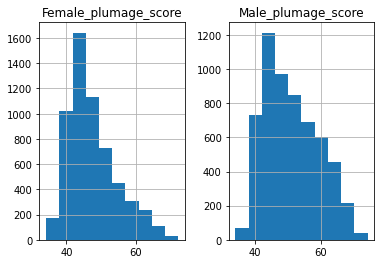

In [ ]:
# show distribution by histogram
# not a barplot!!! 
data.hist(column = ['Female_plumage_score', "Male_plumage_score"])

<AxesSubplot:ylabel='Frequency'>

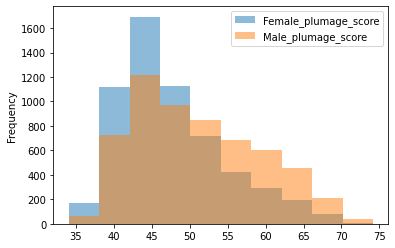

In [ ]:
data[['Female_plumage_score','Male_plumage_score']].plot.hist(alpha=0.5)

<AxesSubplot:xlabel='Female_plumage_score'>

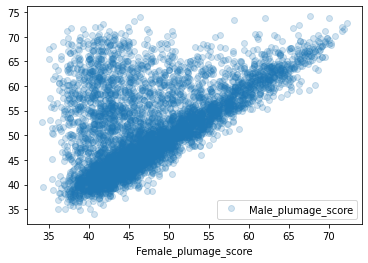

In [ ]:
# scatterplot of two numerical variables
data.plot(x = 'Female_plumage_score', y = 'Male_plumage_score', style = "o", alpha = 0.2)

<AxesSubplot:>

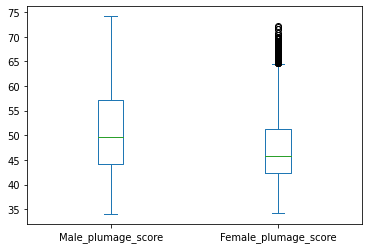

In [ ]:
# plot box plot displaying the distributions of plumage scores for males and females,
#  similar to barplot
data[["Male_plumage_score", "Female_plumage_score"]].plot.box()

In [ ]:
# create column with sum of plumage scores
data["Sum_scores"] = data["Female_plumage_score"] + data["Male_plumage_score"]
# run data.head() to see result

In [ ]:
# add a column with a constant
data["Study"] = 1

In [ ]:
# use NumPy function to add a column of random numbers 
# shape[0] provides the number of rows
data["Rnd"] = np.random.random(data.shape[0])

In [ ]:
# remove a single column
del(data["Sum_scores"])

# remove multiple columns
data.drop(["Rnd", "Study"], axis = 1, inplace = True)

There are several ways of accessing data in a DataFrame: by column label,6 row index number, or specific x,y locations:

In [ ]:
# select data by column label
# select first three rows of output
# remember: noninclusive, 0-based indexing; # row "3" is not included!
data["Scientific_name"][:3]

0      Abroscopus albogularis
1      Abroscopus schisticeps
2    Abroscopus superciliaris
Name: Scientific_name, dtype: object

In [ ]:
# column names can be specified using a dot
data.Scientific_name[:3]

0      Abroscopus albogularis
1      Abroscopus schisticeps
2    Abroscopus superciliaris
Name: Scientific_name, dtype: object

The DataFrame methods `loc` and `iloc` select specific rows and columns without chaining multiple selections (e.g., `data[column][row]` as seen above). While loc uses row and column labels for selection, iloc expects integers that correspond to the positions of rows and columns:

In [ ]:
# select rows by index label
# the row named "3" is included!
# select columns by their label
# (multiple labels within list)
data.loc[:3, ["Scientific_name", "English_name"]]

,Scientific_name,English_name
0,Abroscopus albogularis,Rufous-faced Warbler
1,Abroscopus schisticeps,Black-faced Warbler
2,Abroscopus superciliaris,Yellow-bellied Warbler
3,Acanthagenys rufogularis,Spiny-cheeked Honeyeater


In [ ]:
data.loc[data.Scientific_name == "Zosterops mouroniensis"]

,Scientific_name,English_name,TipLabel,Female_plumage_score,Male_plumage_score
5801,Zosterops mouroniensis,Mount Karthala White-eye,Zosterops_mouroniensis,47.916667,47.5


In [ ]:
# select subset by x,y position (zero-based!) 
# select third row, second column
data.iloc[2, 1]

'Yellow-bellied Warbler'

In [ ]:
# select rows based on only part of the cell content

# select the column Scientific_name of all rows that contain "Bowerbird" in column English_name;
# show first three rows of output
data[data.English_name.str.contains("Bowerbird")]["Scientific_name"][:3]

188      Amblyornis flavifrons
189        Amblyornis inornata
190    Amblyornis macgregoriae
Name: Scientific_name, dtype: object

In [ ]:
# select rows with Male_plumage_score larger than 65
high_male_score = data[data["Male_plumage_score"] > 65]

In [ ]:
# concatenate multiple conditions with Boolean operators
# dimorphic species (stronger sexual selection)
highly_dimorphic = data[(data.Male_plumage_score > 70) & (data.Female_plumage_score < 40)]

In [ ]:
high_male_score["Qualitative_score"] = "High"

<ipython-input-136-39abb1c18326>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_male_score["Qualitative_score"] = "High"


In [ ]:
# When you want to take a subset of the data, and separate it from the original data, 
# you need to copy it:

high_male_score = data[data["Male_plumage_score"] > 65].copy()
high_male_score["Qualitative_score"] = "High"

In [ ]:
# calculate summary stat
data.Male_plumage_score.mean()

51.00918939004288

In [ ]:
data.Male_plumage_score.median()

49.72222222

In [ ]:
data.Male_plumage_score.std()

8.20066293467369

### <font color='green'>**Exercise: Intermezzo 6.2** </font>

Gächter and Schulz (2016) performed a provocative experiment to study intrinsic honesty in different countries. Groups of students were asked to per- form two rolls of a fair die, and to report the result of the first roll. They were paid an amount of money proportional to the reported number, with the exception that they were given no money when they reported rolling a 6. The subjects knew of the monetary reward, and that their rolls were private—the experimenters could not determine whether they were telling the truth or not. If everybody were to tell the truth, we would expect that each claim (from 0 to 5 monetary units) would be equally represented in the data, with a proportion of 1/6 = 0.16. Countries where cheaters were more abundant would have a higher proportion of subjects claiming a reward of 5 units and a lower proportion of those claiming 0 units.

1.   Load the file (`data/Gachter2016_data.csv`) using `pandas`. Pick one country of your choice, and then make a scatterplot with "Claim" as x-axis and "CumulativeFrequency" as y-axis (for the chosen country only).
2. Which country reported the smallest frequency of `Claim == 0` (meaning fewest honest players)? Which the highest?
3.   Now calculate the reported frequency of rolling the number 5 (which would lead to a claim of 5 units) for each country. Which country has the lowest frequency (most honest players)? Which the highest? Notice that the data report cumulative frequencies; to obtain the frequency of rolling a 5, you need to subtract the cumulative frequency of claiming 4 monetary units from 1.0.

## 6.4 Biopython
The Biopython project provides many standardized bioinformatics tools which, for example, facilitate the analysis and visualization of sequence data, the interface with data repositories, the parsing of popular file formats, and the integration of programs such as BLAST or Primer3.



In [ ]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 36.2 MB/s eta 0:00:00


In [ ]:
# import the package
from Bio import Entrez
# provide your e-mail address to let NCBI know who you are 
Entrez.email = "wqiu@hunter.cuny.edu"
# search for shrew sequence records
handle = Entrez.esearch(db = "nuccore", term = ("Uropsilus investigator[Organism]"))

In [ ]:
record = Entrez.read(handle)
handle.close()
# record is a dictionary, we can look at the keys 
record.keys()
# your output may look different:
# dictionaries have no natural order

dict_keys(['Count', 'RetMax', 'RetStart', 'IdList', 'TranslationSet', 'TranslationStack', 'QueryTranslation'])

In [ ]:
record["Count"]

'128'

In [ ]:
# retrieve list of GenBank identifiers 
id_list = record["IdList"] 
print(id_list)

['2292855435', '2192921072', '478247724', '478247688', '478247686', '478247684', '478247644', '478247642', '478247640', '426259247', '1631860235', '1631860231', '1631860225', '1631860187', '1631860183', '1631860181', '1631860179', '1631860169', '1631859951', '1631859923']


Now that we know what is available (using Entrez.search) we can fetch our sequence data using Entrez.efetch. We retrieve the first 10 sequences in FASTA format and save them to a file:

In [ ]:
# always tell NCBI who you are 
Entrez.email = "wqiu@hunter.cuny.edu"
handle = Entrez.efetch(db = "nuccore", rettype = "fasta", retmode = "text", id = id_list[:10])

In [ ]:
# set up a handle to an output file 
out_handle = open("Uropsilus_seq.fasta", "w")

In [ ]:
# write obtained sequence data to file
for line in handle:
  out_handle.write(line)
out_handle.close()
handle.close()

In [ ]:
# run unix commands to view retreived data
!ls
!grep ">" Uropsilus_seq.fasta

CSB-BIOL425  sample_data  Uropsilus_seq.fasta
>MW682667.1 Uropsilus investigator voucher KIZ:PM180283 cytochrome b (cytb) gene, complete cds; mitochondrial
>NC_060485.1 Uropsilus investigator mitochondrion, complete genome
>KC516837.1 Uropsilus investigator isolate A11 apolipoprotein B (ApoB) gene, partial cds
>KC516819.1 Uropsilus investigator voucher mlxs331 cytochrome c oxidase subunit I (COI) gene, partial cds, alternatively spliced; mitochondrial
>KC516818.1 Uropsilus investigator voucher mlxs022 cytochrome c oxidase subunit I (COI) gene, partial cds, alternatively spliced; mitochondrial
>KC516817.1 Uropsilus investigator voucher CY11N009 cytochrome c oxidase subunit I (COI) gene, partial cds, alternatively spliced; mitochondrial
>KC516797.1 Uropsilus investigator voucher mlxs331 cytochrome b (CYTB) gene, complete cds; mitochondrial
>KC516796.1 Uropsilus investigator voucher mlxs022 cytochrome b (CYTB) gene, complete cds; mitochondrial
>KC516795.1 Uropsilus investigator voucher CY

### 6.4.2 Input and Output of Sequence Data using `SeqIO`

Next, we use the module SeqIO to manipulate our sequences and obtain more information about our U. investigator results:

In [ ]:
from Bio import SeqIO
handle = open("Uropsilus_seq.fasta", "r")

In [ ]:
# print ID and sequence length
for record in SeqIO.parse(handle, "fasta"):
  print(record.description)
  print(len(record))
handle.close()

MW682667.1 Uropsilus investigator voucher KIZ:PM180283 cytochrome b (cytb) gene, complete cds; mitochondrial
1140
NC_060485.1 Uropsilus investigator mitochondrion, complete genome
16519
KC516837.1 Uropsilus investigator isolate A11 apolipoprotein B (ApoB) gene, partial cds
573
KC516819.1 Uropsilus investigator voucher mlxs331 cytochrome c oxidase subunit I (COI) gene, partial cds, alternatively spliced; mitochondrial
912
KC516818.1 Uropsilus investigator voucher mlxs022 cytochrome c oxidase subunit I (COI) gene, partial cds, alternatively spliced; mitochondrial
912
KC516817.1 Uropsilus investigator voucher CY11N009 cytochrome c oxidase subunit I (COI) gene, partial cds, alternatively spliced; mitochondrial
912
KC516797.1 Uropsilus investigator voucher mlxs331 cytochrome b (CYTB) gene, complete cds; mitochondrial
1140
KC516796.1 Uropsilus investigator voucher mlxs022 cytochrome b (CYTB) gene, complete cds; mitochondrial
1140
KC516795.1 Uropsilus investigator voucher CY11N009 cytochrome 

In [ ]:
# select only the records of the COI gene and shorten our sequences 
import re
gene = 'COI'
output_handle = open("Uropsilus_" + gene + ".fasta", "w")
for record in SeqIO.parse("Uropsilus_seq.fasta", "fasta"):  
  # find BMI1 sequences
  if re.search(gene, record.description):
    print(record.id)
    # shorten sequence by Python slicing
    short_seq = record[:100] 
    SeqIO.write(short_seq, output_handle, "fasta")
output_handle.close()

KC516819.1
KC516818.1
KC516817.1


In [ ]:
!ls
!cat Uropsilus_COI.fasta


CSB-BIOL425  Uropsilus_BMI1.fasta  Uropsilus_seq.fasta
sample_data  Uropsilus_COI.fasta
>KC516819.1 Uropsilus investigator voucher mlxs331 cytochrome c oxidase subunit I (COI) gene, partial cds, alternatively spliced; mitochondrial
ATGTTCATTAATCGTTGACTATTCTCAACAAACCATAAAGATATTGGCACTTTATATATA
CTATTTGGTGCTTGAGCAGGAATAGTGGGTACCGCTCTTA
>KC516818.1 Uropsilus investigator voucher mlxs022 cytochrome c oxidase subunit I (COI) gene, partial cds, alternatively spliced; mitochondrial
ATGTTCATTAATCGTTGACTATTCTCAACAAACCATAAAGATATTGGCACCTTATATATA
CTATTTGGTGCTTGAGCAGGAATAGTGGGTACCGCTCTTA
>KC516817.1 Uropsilus investigator voucher CY11N009 cytochrome c oxidase subunit I (COI) gene, partial cds, alternatively spliced; mitochondrial
ATGTTCATTAATCGTTGACTATTCTCAACAAACCATAAAGATATTGGCACCTTATATATA
CTATTTGGTGCTTGAGCAGGAATAGTGGGCACCGCTCTTA


### 6.4.3 Programmatic BLAST Search
The Basic Local Alignment Search Tool (BLAST) finds regions of similarity between biological sequences. Biopython provides a module to conveniently run a BLAST search against online databases:

In [ ]:
# NCBIWWW allows programmatic access to NCBI's BLAST server
from Bio.Blast import NCBIWWW
# retrieve sequences using SeqIO
handle = open("Uropsilus_COI.fasta", "r")
# convert SecRecord into a list for easy access 
records = list(SeqIO.parse(handle, "fasta"))
# retrieve third sequence
print(records[2].id, " ", records[2].seq)

KC516817.1   ATGTTCATTAATCGTTGACTATTCTCAACAAACCATAAAGATATTGGCACCTTATATATACTATTTGGTGCTTGAGCAGGAATAGTGGGCACCGCTCTTA


In [ ]:
# always tell NCBI who you are
Entrez.email = "wqiu@hunter.cuny.edu"
# NCBIWWW.qplast requires three arguments:
# program, database, sequence
result_handle = NCBIWWW.qblast("blastn", "nt", records[2].seq)
# set up output file
save_file = open("my_blast.xml", "w") 
# write results to output file 
save_file.write(result_handle.read()) 
save_file.close() 
result_handle.close()

In [ ]:
# make sure the file has been generated and is not empty
!ls -lrt

total 124
drwxr-xr-x  1 root root  4096 Feb 23 14:38 sample_data
drwxr-xr-x 14 root root  4096 Feb 24 19:32 CSB-BIOL425
-rw-r--r--  1 root root 42589 Feb 24 23:08 Uropsilus_seq.fasta
-rw-r--r--  1 root root   739 Feb 24 23:11 Uropsilus_BMI1.fasta
-rw-r--r--  1 root root   739 Feb 24 23:13 Uropsilus_COI.fasta
-rw-r--r--  1 root root 64184 Feb 24 23:16 my_blast.xml


In [ ]:
from Bio.Blast import NCBIXML
result_handle = open("my_blast.xml")
# use NCBIXML.read if you run BLAST for one sequence 
# or NCBIXML.parse for multiple sequences 
blast_records = NCBIXML.read(result_handle)

In [ ]:
# show BLAST hits
E_VALUE_THRESH = 0.04
for alignment in blast_records.alignments:
  for hsp in alignment.hsps:
    if hsp.expect < E_VALUE_THRESH and alignment.length > 3000: 
      print("****Alignment****") 
      print("sequence:", alignment.title) 
      print("length:", alignment.length) 
      print("E value:", hsp.expect) 
      print(hsp.query[0:75] + "...") 
      print(hsp.match[0:75] + "...") 
      print(hsp.sbjct[0:75] + "...")

****Alignment****
sequence: gi|2192921072|ref|NC_060485.1| Uropsilus investigator mitochondrion, complete genome >gi|426259247|gb|JX945574.1| Uropsilus investigator mitochondrion, complete genome
length: 16519
E value: 1.37785e-41
ATGTTCATTAATCGTTGACTATTCTCAACAAACCATAAAGATATTGGCACCTTATATATACTATTTGGTGCTTGA...
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||...
ATGTTCATTAATCGTTGACTATTCTCAACAAACCATAAAGATATTGGCACCTTATATATACTATTTGGTGCTTGA...
****Alignment****
sequence: gi|426259233|gb|JX945573.1| Uropsilus andersoni mitochondrion, complete genome
length: 16524
E value: 1.57213e-34
ATGTTCATTAATCGTTGACTATTCTCAACAAACCATAAAGATATTGGCACCTTATATATACTATTTGGTGCTTGA...
|||||||||||||||||||||||||||||||| ||||||||||||||||||||||||||| ||||||||||||||...
ATGTTCATTAATCGTTGACTATTCTCAACAAATCATAAAGATATTGGCACCTTATATATATTATTTGGTGCTTGA...
****Alignment****
sequence: gi|1593552218|ref|NC_041144.1| Uropsilus andersoni mitochondrion, complete genome >gi|1565054176|gb|MF280389.1| Uropsilus and

### 6.4.4 Querying PubMed for Scientific Literature

In [ ]:
Entrez.email = "wqiu@hunter.cuny.edu"
handle = Entrez.esearch(db = "pubmed", term = ("spaetzle[Title/Abstract] AND Drosophila[ALL]"), usehistory = "y")
# parse results and convert to Python dictionary
record = Entrez.read(handle) 
handle.close()
# how many hits were found? 
record["Count"]
# 13 records found that contained the word "spaetzle"
# and "Drosophila" (at time of preparation of this book)

'18'

In [ ]:
# store WebEnv and QueryKey in variables for later 
webenv = record["WebEnv"]
query_key = record["QueryKey"]

In [ ]:
handle = Entrez.efetch(db = "pubmed", rettype = "medline", retmode = "text", webenv = webenv, query_key = query_key)
out_handle = open("Spaetzle_abstracts.txt", "w") 
data = handle.read()
handle.close()
out_handle.write(data)
out_handle.close()

In [ ]:
!ls -lrt
!head Spaetzle_abstracts.txt

total 192
drwxr-xr-x  1 root root  4096 Feb 23 14:38 sample_data
drwxr-xr-x 14 root root  4096 Feb 24 19:32 CSB-BIOL425
-rw-r--r--  1 root root 42589 Feb 24 23:08 Uropsilus_seq.fasta
-rw-r--r--  1 root root   739 Feb 24 23:11 Uropsilus_BMI1.fasta
-rw-r--r--  1 root root   739 Feb 24 23:13 Uropsilus_COI.fasta
-rw-r--r--  1 root root 64184 Feb 24 23:16 my_blast.xml
-rw-r--r--  1 root root 69273 Feb 24 23:18 Spaetzle_abstracts.txt

PMID- 36675034
OWN - NLM
STAT- MEDLINE
DCOM- 20230127
LR  - 20230202
IS  - 1422-0067 (Electronic)
IS  - 1422-0067 (Linking)
VI  - 24
IP  - 2


In [ ]:
import re
with open("Spaetzle_abstracts.txt") as datafile:
  pubmed_input = datafile.read()
  # delete newlines followed by 6 white spaces
  # to have titles and abstracts on one line 
  pubmed_input = re.sub(r"\n\s{6}", " ", pubmed_input) 
  for line in pubmed_input.split("\n"):
    if re.match("PMID", line):
      PMID = re.search(r"\d+", line).group()
    if re.match("AB", line):
      spaetzle = re.findall(r"([^.]*?Spaetzle[^.]*\.)", line)
      # don't print if list of matches is empty 
      if spaetzle:
        print("PubMedID: ", PMID, " ", spaetzle)

PubMedID:  36675034   [' Spaetzle proteins, activated by immune  signals from upstream components, bind to Toll proteins, thus, activating the  Toll pathway, which in turn, induces AMP genes.']
PubMedID:  36135484   [' These genes include cact, TI, Myd88, Dif/DI, pll, tub, and spz  encoding Cactus, Toll, Myeloid differentiation factor 88, Dorsal related immunity  factor/Dorsal, Pelle, Tube, and Spaetzle, respectively.']
PubMedID:  32591083   [' These  events promote the ventral processing of Spaetzle, a ligand for Toll, which  ultimately sets up the embryonic dorsal-ventral axis.']
PubMedID:  32014469   [' In addition, beta-1, 3-glucan (laminarin), the main  component of the cell wall of the pathogenic fungus Metarhizium acridum, was  capable of activating the Toll signaling pathway (Spaetzle and Cactus) when it  was applied on the host cuticle.']
PubMedID:  31719046   ['  The dynamics indicate that a sharp extracellular gradient is formed through  diffusion-based shuttling of the Spae